In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import struct

dir = '../Trace/' # WSL 22.04.
#dir = '../../mnt/c/Users/louxsoen/Documents/P/Nerual-Network-SCA/Float-Point-NN-Mantissa/Trace/'

In [2]:
relu = np.load(dir + 'relu.npy')
rmlp = np.load(dir + 'mlp.npy')
print(relu.shape)
print(rmlp.shape)

(3, 24000)
(255, 12000)


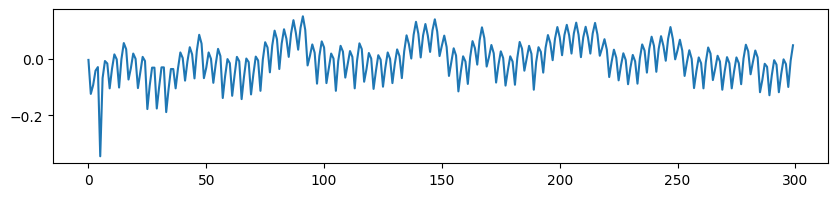

0.9748441900038993


In [3]:

cutsize = 300
strsize = 0
cutR = np.zeros([2, cutsize])
cutR[0] = relu[1][strsize:strsize + cutsize] # middle
cutR[1] = relu[2][strsize:strsize + cutsize]

plt.figure(figsize=(10,2))
plt.plot(cutR[0])
plt.show()

print(np.corrcoef(cutR[0], cutR[1])[0,1])
if cutsize + strsize > 1050:    print("OVER SHOOT")

In [4]:
endpt = 8000
zcoip = 255

corr_minus = np.zeros([zcoip, endpt])
corr_plus  = np.zeros([zcoip, endpt])
max_minus = np.zeros(endpt)
loc_minus = np.zeros(endpt)
max_plus  = np.zeros(endpt)
loc_plus  = np.zeros(endpt)
#for j in range(1, 2):

#  Minus ReLU
'''for a in range(0, zcoip):
    for i in range(0, endpt, 1):
        mcut = rmlp[a][i:i+cutsize]
        corr_minus[a][i] = np.corrcoef(mcut, cutR[0])[0,1]
        if corr_minus[a][i] > max_minus[a]:
            max_minus[a] = corr_minus[a][i]
            loc_minus[a] = i
'''
#   Plus ReLU
for a in range(0, zcoip):
    for i in range(0, endpt, 1):
        mcut = rmlp[a][i:i+cutsize]
        corr_plus[a][i] = np.corrcoef(mcut, cutR[1])[0,1]
        if corr_plus[a][i] > max_plus[a]:
            max_plus[a] = corr_plus[a][i]
            loc_plus[a] = i


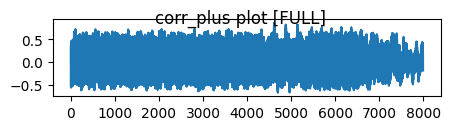

In [5]:

'''plt.figure(figsize=(5,1))
plt.suptitle('corr_minus plot [FULL]')
plt.plot(corr_minus[0])
plt.show()
'''
plt.figure(figsize=(5,1))
plt.suptitle('corr_plus plot [FULL]')
plt.plot(corr_plus[0])
plt.show()

In [6]:
#corr_minus = np.transpose(corr_minus)
#corr_plus  = np.transpose(corr_plus)
#np.save(dir + "corrm", corr_minus)
np.save(dir + "corrp",  corr_plus)

In [7]:
corrp = np.load(dir + "corrp.npy")
corrm = np.load(dir + "corrm.npy")
ref = 4
stp = 260

maxval = np.zeros([255, ref])
timing = np.zeros([255, ref-1])
area = np.zeros(stp)

for trace in range(0, 255):
    mdex = np.argmax(corrp[trace])
    for block in range(0, ref):
        sdex = mdex + (stp * block)
        area = corrp[trace][sdex:sdex+stp]
        maxval[trace][block] = np.argmax(area)

for t in range(0, 255):
    for i in range(0, ref):
        maxval[t][i] += stp * i
for t in range(0, 255):
    for i in range(0, ref-1):
        timing[t][i] = (maxval[t][i+1] - maxval[t][i]) / 4

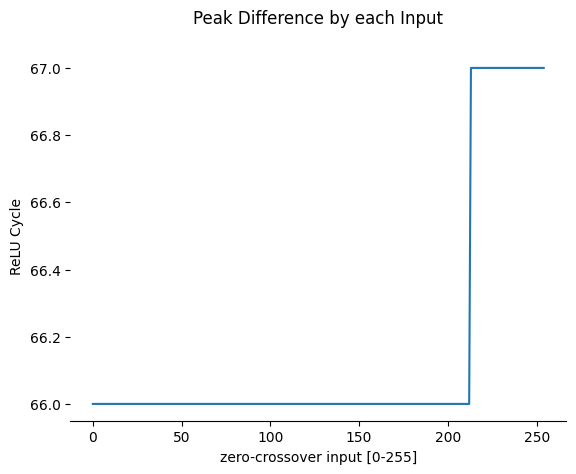

In [8]:
fig, ax = plt.subplots()
timing = np.transpose(timing)
ax.set_title('Peak Difference by each Input', pad=20)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('zero-crossover input [0-255]')
ax.set_ylabel('ReLU Cycle')
plt.plot(timing[0], '-')
plt.show()

In [9]:
timing = np.transpose(timing)
np.save(dir + "diff", timing)